In [14]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'x')

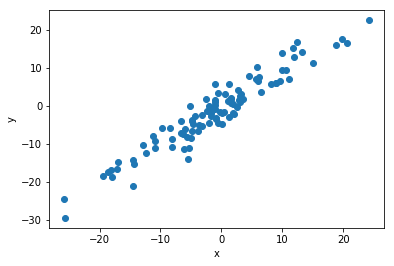

In [16]:
X = torch.randn(100,1)*10
y= X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y') 
plt.xlabel('x')




In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [21]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

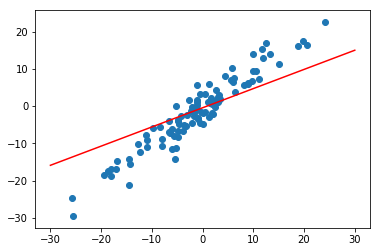

In [24]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [26]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 26.700185775756836
epoch: 1 loss: 20.196239471435547
epoch: 2 loss: 15.923158645629883
epoch: 3 loss: 13.115731239318848
epoch: 4 loss: 11.271230697631836
epoch: 5 loss: 10.059378623962402
epoch: 6 loss: 9.26317024230957
epoch: 7 loss: 8.740036010742188
epoch: 8 loss: 8.39631175994873
epoch: 9 loss: 8.17046070098877
epoch: 10 loss: 8.022053718566895
epoch: 11 loss: 7.924526691436768
epoch: 12 loss: 7.860429286956787
epoch: 13 loss: 7.818295478820801
epoch: 14 loss: 7.790592670440674
epoch: 15 loss: 7.772371768951416
epoch: 16 loss: 7.76038122177124
epoch: 17 loss: 7.752484321594238
epoch: 18 loss: 7.747278213500977
epoch: 19 loss: 7.743840217590332
epoch: 20 loss: 7.741564750671387
epoch: 21 loss: 7.740054130554199
epoch: 22 loss: 7.739046096801758
epoch: 23 loss: 7.738368988037109
epoch: 24 loss: 7.73790979385376
epoch: 25 loss: 7.7375946044921875
epoch: 26 loss: 7.7373738288879395
epoch: 27 loss: 7.737216949462891
epoch: 28 loss: 7.737101078033447
epoch: 29 loss: 7.737

Text(0.5, 0, 'epoch')

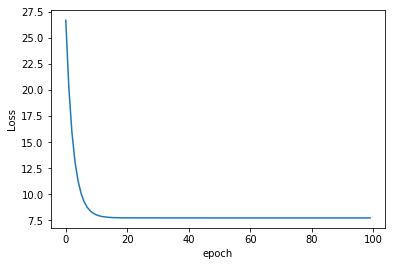

In [27]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

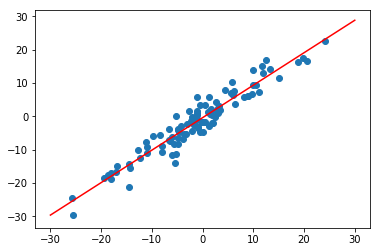

In [28]:
plot_fit("Trained Model")